In [ ]:
!pip uninstall numpy -y
!pip uninstall pandas_ta -y
!pip install numpy
!pip install pandas_ta

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
Found existing installation: pandas-ta 0.3.14b0
Uninstalling pandas-ta-0.3.14b0:
  Successfully uninstalled pandas-ta-0.3.14b0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_ta-0.3.14b0-py3-none-any.whl


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta

In [ ]:
dataset = yf.download('AAPL',period='6y')
dataset=pd.DataFrame(dataset)

Enter the Ticker Id:-AAPL
Enter the Start Date [YYYY-MM-DD]:-2015-01-01
Enter the End Date [YYYY-MM-DD]:-2023-05-01
[*********************100%***********************]  1 of 1 completed


In [ ]:
dataset.head()
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,165.330002,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.770004,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800
2023-04-27,165.190002,168.559998,165.190002,168.410004,168.410004,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.679993,55209200


In [ ]:
dataset = dataset[['Adj Close']]
dataset.head()

,Adj Close
Date,
2015-01-02,24.565699
2015-01-05,23.873644
2015-01-06,23.875895
2015-01-07,24.210684
2015-01-08,25.140913


In [ ]:
dataset['ema'] = pandas_ta.ema(dataset['Adj Close'],length=10)
dataset.head()

,Adj Close,ema
Date,,
2015-01-02,24.565699,NaN
2015-01-05,23.873644,NaN
2015-01-06,23.875895,NaN
2015-01-07,24.210684,NaN
2015-01-08,25.140913,NaN


In [ ]:
dataset = dataset.iloc[10:]
dataset.head()

,Adj Close,ema
Date,,
2015-01-16,23.815220,24.360860
2015-01-20,24.428631,24.373182
2015-01-21,24.615129,24.417173
2015-01-22,25.255501,24.569596
2015-01-23,25.385828,24.718002


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
dataset['Adj Close'] = scale.fit_transform(np.array(dataset['Adj Close']).reshape(-1,1))
dataset['ema'] = scale.fit_transform(np.array(dataset['ema']).reshape(-1,1))

In [ ]:
train_size = int(len(dataset) * 0.8)
train_data, test_data = dataset[:train_size], dataset[train_size:]

In [ ]:
X_train, y_train = train_data.drop('ema', axis=1), train_data['ema']
X_test, y_test = test_data.drop('ema', axis=1), test_data['ema']

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1668 entries, 2015-01-16 to 2021-08-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1668 non-null   float64
dtypes: float64(1)
memory usage: 26.1 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1668 entries, 2015-01-16 to 2021-08-31
Series name: ema
Non-Null Count  Dtype  
--------------  -----  
1668 non-null   float64
dtypes: float64(1)
memory usage: 26.1 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 417 entries, 2021-09-01 to 2023-04-28
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  417 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 417 entries, 2021-09-01 to 2023-04-28
Series name: ema
Non-Null Count  Dtype  
--------------  -----  
417 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB


In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#calculate scores for model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# calculate predictions on training and test sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# calculate r2 scores for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# calculate mean absolute errors for training and test sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# calculate mean squared errors for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# calculate root mean squared errors for training and test sets
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# print scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{train_r2:.6f}\t\t{test_r2:.6f}
{'MAE'.ljust(10)}{train_mae:.6f}\t\t{test_mae:.6f}
{'MSE'.ljust(10)}{train_mse:.6f}\t\t{test_mse:.6f}
{'RMSE'.ljust(10)}{train_rmse:.6f}\t\t{test_rmse:.6f}
'''
print(scores)


Metric           Train                Test        
r2_score  0.997734		0.868055
MAE       0.006609		0.021771
MSE       0.000115		0.000728
RMSE      0.010729		0.026987



In [ ]:
# Perform time series cross-validation
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
linear_rmse_cv = []

for train_index, test_index in tscv.split(dataset):
    X_train_cv, y_train_cv = dataset.iloc[train_index].drop('ema', axis=1), dataset.iloc[train_index]['ema']
    X_test_cv, y_test_cv = dataset.iloc[test_index].drop('ema', axis=1), dataset.iloc[test_index]['ema']

    linear_model_cv = LinearRegression()
    linear_model_cv.fit(X_train_cv, y_train_cv)
    linear_y_pred_cv = linear_model_cv.predict(X_test_cv)
    linear_rmse_cv.append(np.sqrt(mean_squared_error(y_test_cv, linear_y_pred_cv)))

# Select the best model based on cross-validation results
best_model = 'Linear Regression'

# Train the best model on the entire dataset
if best_model == 'Linear Regression':
    best_model_fit = linear_model.fit(dataset.drop('ema', axis=1), dataset['ema'])
    best_model_y_pred = best_model_fit.predict(X_test)
    best_model_rmse = np.sqrt(mean_squared_error(y_test, best_model_y_pred))
    best_model_r2 = r2_score(y_test, best_model_y_pred)

In [ ]:
best_model_rmse

0.026146090404073525

In [ ]:
best_model_r2

0.8761525194452582

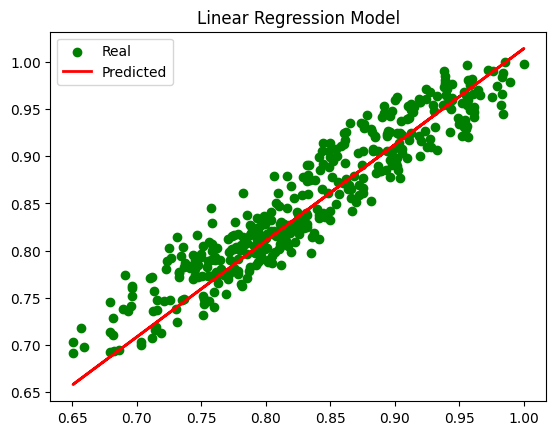

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='green', label='Real')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import yfinance as yf

In [ ]:
df = yf.download('AAPL',period='20y')
df=pd.DataFrame(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-05-02,0.258214,0.260536,0.256071,0.258036,0.219619,321182400
2003-05-05,0.263750,0.301429,0.263393,0.287321,0.244544,1555708000
2003-05-06,0.287857,0.319643,0.287500,0.312500,0.265975,1514492000
2003-05-07,0.309464,0.325714,0.305536,0.315179,0.268255,1054379200
2003-05-08,0.316071,0.322679,0.308750,0.321429,0.273574,687736000


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,36.832615,37.250469,36.428571,36.857152,35.455061,4.148720e+08
std,46.839122,47.419660,46.299546,46.887492,46.866870,3.936887e+08
min,0.258214,0.260536,0.256071,0.258036,0.219619,1.344583e+07
25%,4.670179,4.750000,4.575000,4.675535,3.979435,1.243598e+08
50%,19.177500,19.314644,18.968214,19.141430,16.776701,2.837492e+08
75%,43.321251,43.700001,42.977501,43.276251,41.350878,5.805002e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,3.372970e+09


In [ ]:
# Use 'Adj Close' as X and shift it to obtain tomorrow's 'Adj Close' as Y
X = df['Adj Close'].values[:-1].reshape(-1, 1)
Y = df['Adj Close'].shift(-1).dropna().values.reshape(-1, 1)

In [ ]:
# Split the data into train and test sets using a rolling window
window_size = 30
num_samples = len(X) - window_size
X_train, Y_train = X[:num_samples], Y[:num_samples]
X_test, Y_test = X[num_samples:], Y[num_samples:]

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
Y_train_scaled = scaler.fit_transform(Y_train)
X_test_scaled = scaler.transform(X_test)
Y_test_scaled = scaler.transform(Y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train_scaled)

LinearRegression()

In [ ]:
# Predict on the test set
Y_pred_scaled = linear_model.predict(X_test_scaled)

Y_pred_scaled = Y_pred_scaled.reshape(-1,1)

# Rescale the predicted values
Y_pred = scaler.inverse_transform(Y_pred_scaled)
Y_test = scaler.inverse_transform(Y_test_scaled)
X_test = scaler.inverse_transform(X_test_scaled)

In [ ]:
# Evaluate the model
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, Y_pred))
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(Y_test, Y_pred)))

print("R2_score: %.3f" %r2_score(Y_test, Y_pred))

Mean squared error: 3.72
Coefficient of determination: 0.69
Mean absolute error: 1.49
Root mean squared error: 1.93
R2_score: 0.689


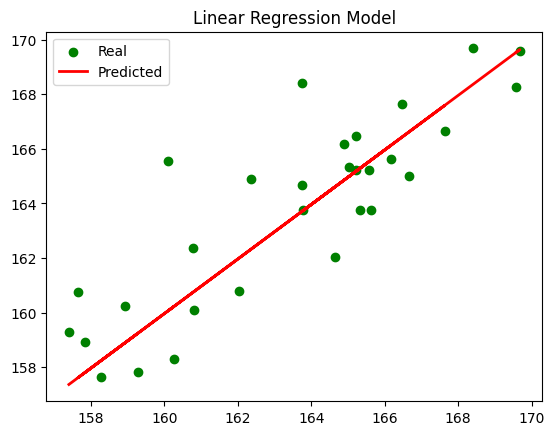

In [ ]:
plt.scatter(X_test, Y_test, color='green', label='Real')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression Model')
plt.legend()
plt.show()